pip install scikit-learn

# HKCT

In [2]:
pip install -U scikit-learn

In [47]:
# pip install -U seaborn

# your Win CMD

In [ ]:
py -m pip install scikit-learn

# your Mac terminal

In [ ]:
pip3 install scikit-learn

# Multiple Regression

In [1]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df_adv = pd.read_csv('Advertising.csv',index_col=0) 


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
df_adv.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [2]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## Study the data visually

### Found out the Sales may be not affected by Newspaper 

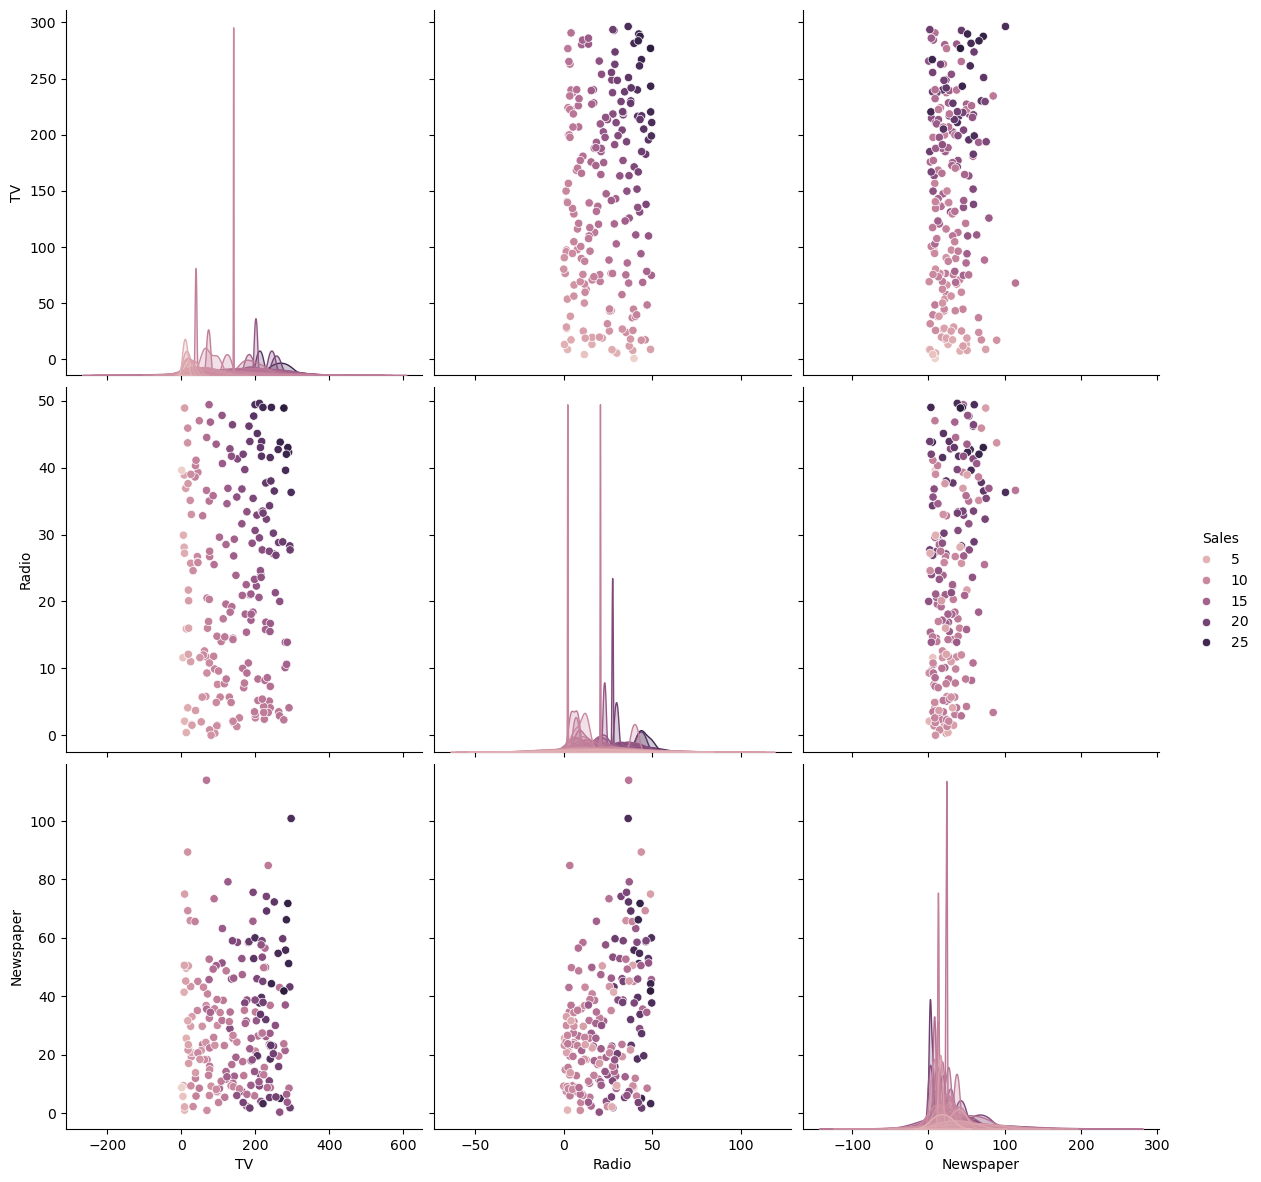

In [3]:
sns.pairplot(df_adv, hue="Sales", height=4)

In [24]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
pip install plotly

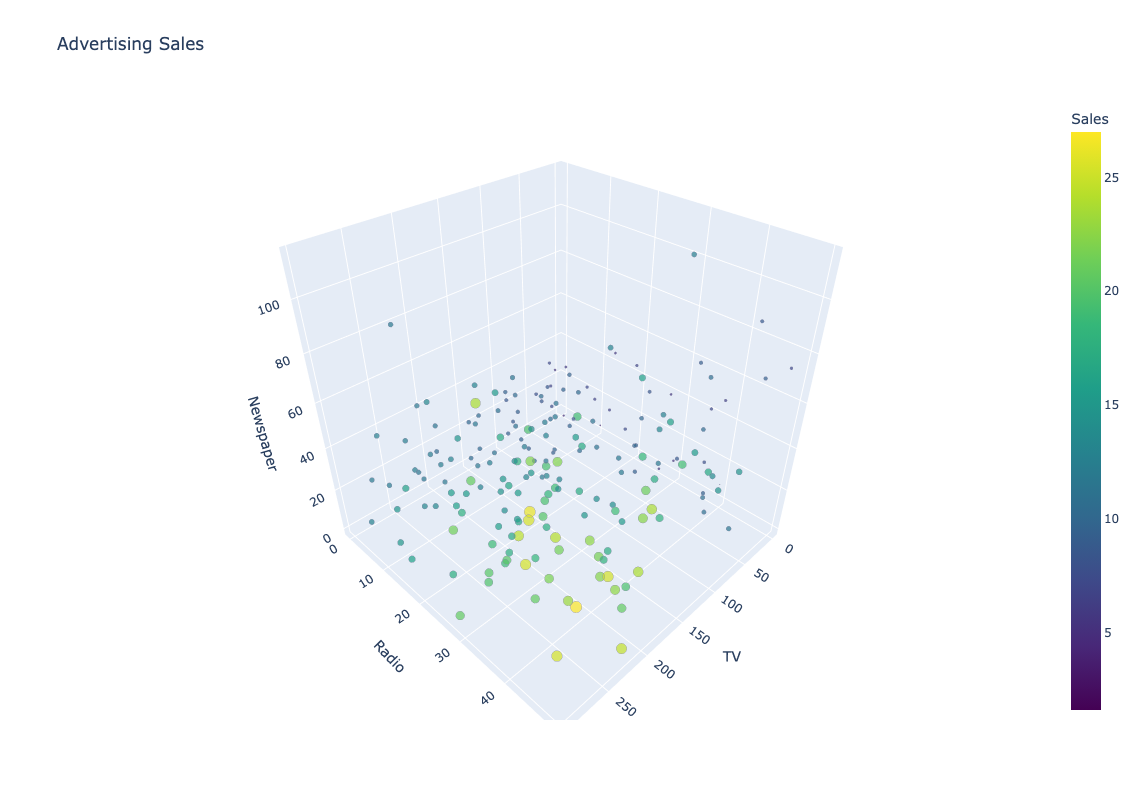

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=df_adv.TV,
    y=df_adv.Radio,
    z=df_adv.Newspaper,
    text=df_adv.Sales,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=2,
        size=df_adv.Sales,
        color = df_adv.Sales,
        colorscale = 'Viridis',
        colorbar_title = 'Sales',
        line_color='rgb(140, 140, 170)'
    )
))

fig.update_layout(height=800, width=800,
    scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Newspaper'
    ),
    title='Advertising Sales'
)

fig.show()

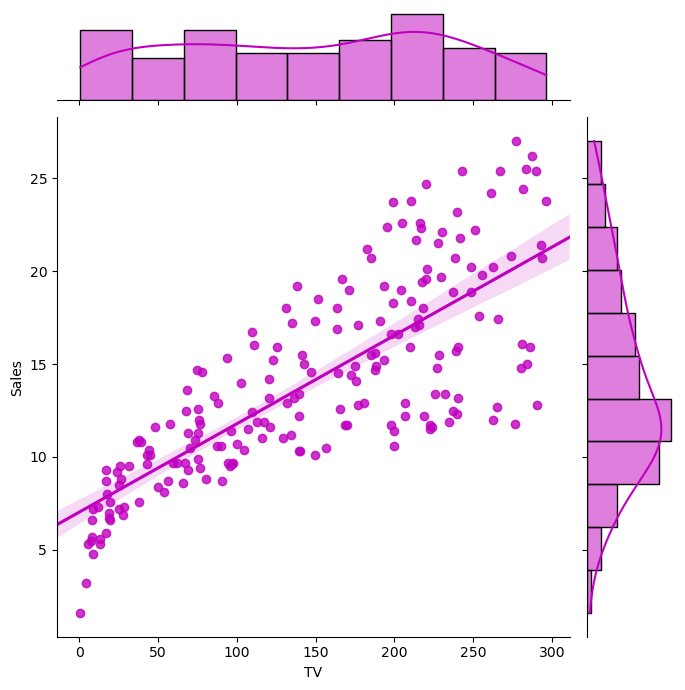

In [4]:
sns.jointplot(x="TV", y="Sales", data=df_adv,
                  kind="reg", truncate=False,
                  color="m", height=7)

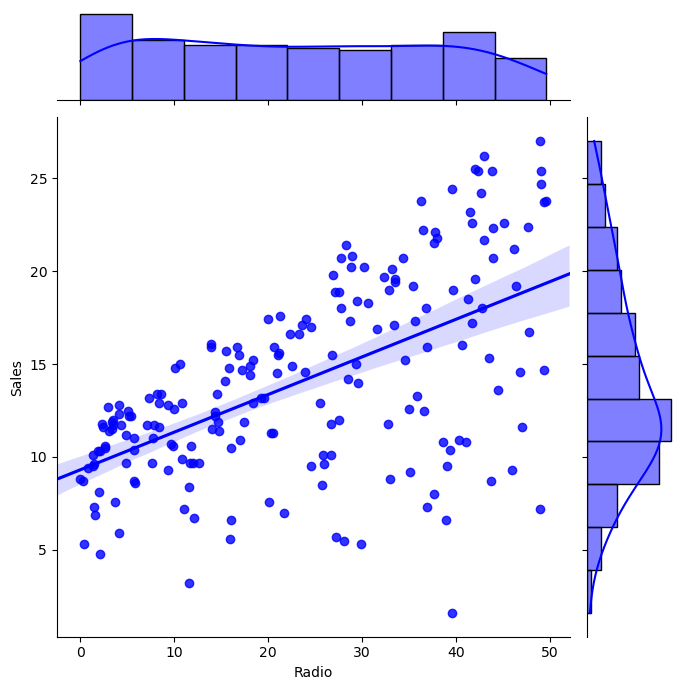

In [5]:
sns.jointplot(x="Radio", y="Sales", data=df_adv,
                  kind="reg", truncate=False,
                  color="b", height=7)

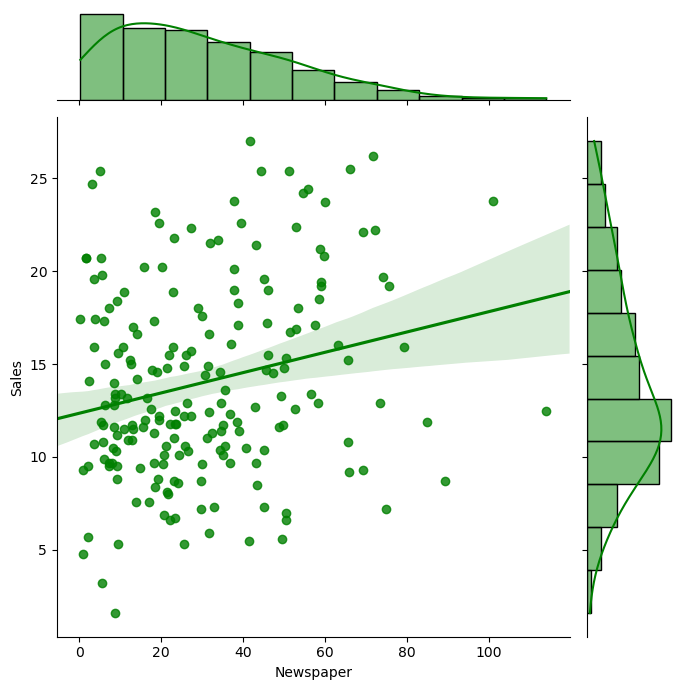

In [6]:
sns.jointplot(x="Newspaper", y="Sales", data=df_adv,
                  kind="reg", truncate=False,
                  color="g", height=7)

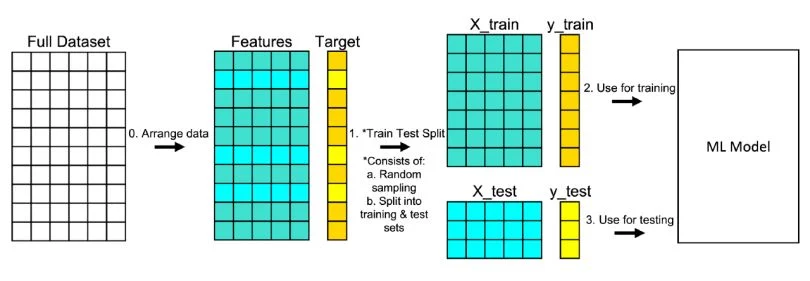

In [7]:
df_train, df_test = df_adv.iloc[0:150], df_adv.iloc[150:200]

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         150 non-null    float64
 1   Radio      150 non-null    float64
 2   Newspaper  150 non-null    float64
 3   Sales      150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 151 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         50 non-null     float64
 1   Radio      50 non-null     float64
 2   Newspaper  50 non-null     float64
 3   Sales      50 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [10]:
X_train, y_train = df_train[["TV","Radio","Newspaper"]],df_train["Sales"]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Use the above trained model to predict the Sales in test df
y_pred = regr.predict(df_test[["TV","Radio","Newspaper"]])

In [11]:
type(regr)

sklearn.linear_model._base.LinearRegression

In [12]:
r2_score(df_test["Sales"], y_pred)

0.8963519785440216

In [13]:
print("Mean Square Error:",mean_squared_error(df_test["Sales"], y_pred) )

Mean Square Error: 2.66702486838371


In [14]:
print("Root Mean Square Error:", root_mean_squared_error(df_test["Sales"], y_pred) )

Root Mean Square Error: 1.6331028346015783


In [15]:
regr.intercept_

3.029766796293682

In [16]:
regr.coef_

array([ 0.04700012,  0.17993257, -0.00140273])

### Expected_Sales = 3.0298 + 0.047TV + 0.18Radio - 0.0014Newspaper
### - or - 
### Expected_Sales = 3.0298 + 0.047TV + 0.18Radio - 0.0014Newspaper +/- 1.6331

In [17]:
#Place $300 into ads, we might follow this method
print("TV: ", (300-3.0298) * 0.047/ (0.047+0.18) ) 
print("Radio: ", (300-3.0298) * 0.18/ (0.047+0.18) ) 

TV:  61.48722202643172
Radio:  235.48297797356827


In [18]:
new_ads = pd.DataFrame(np.array([[61.48722202643172, 235.48297797356827, 0]]), 
                       columns=['TV','Radio','Newspaper'])

In [19]:
# Predict with data
regr.predict(new_ads)

array([48.29073127])

In [20]:
# If you don't want to see the warning, you can create a dataframe
regr.predict( df_test[["TV","Radio","Newspaper"]].iloc[:1] )

array([18.67186188])

In [21]:
df_test[["TV","Radio","Newspaper"]].iloc[:1]

,TV,Radio,Newspaper
151,280.7,13.9,37.0


In [22]:
df_test.iloc[0:1]

,TV,Radio,Newspaper,Sales
151,280.7,13.9,37.0,16.1
